In [105]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
cityFile = "city_data.csv"
rideFile = "ride_data.csv"

# Read the City and Ride Data
cityData = pd.read_csv(cityFile)
rideData = pd.read_csv(rideFile)

# Combine the data into a single dataset
combinedData = pd.merge(rideData, cityData, how="left", on=["city", "city"])
combined_df = pd.DataFrame(combinedData)

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

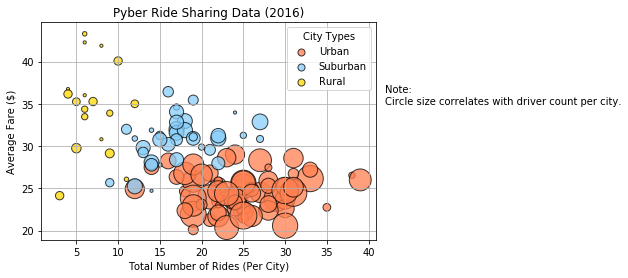

In [106]:
#grouping by city to get totals for each city
groupedCity = combined_df.groupby('city')

avgFare = groupedCity['fare'].mean()
totalRides = groupedCity['ride_id'].count()
totalDrivers = (groupedCity.apply(lambda x: x['driver_count'].unique()).str.get(0))
cityType = (groupedCity.apply(lambda x: x['type'].unique()).str.get(0))

newDF = pd.DataFrame({
                        'Average Fare': avgFare,
                        'Total Rides': totalRides,
                        'Total Drivers': totalDrivers,
                        'City Type': cityType
})

# Obtain the x and y coordinates for each of the three city types
#urban
urbanx = newDF[newDF['City Type']=='Urban']['Total Rides']
urbany = newDF[newDF['City Type']=='Urban']['Average Fare']
urbanDriver = newDF[newDF['City Type']=='Urban']['Total Drivers']
#suburban
suburbanx = newDF[newDF['City Type']=='Suburban']['Total Rides']
suburbany = newDF[newDF['City Type']=='Suburban']['Average Fare']
suburbanDriver = newDF[newDF['City Type']=='Suburban']['Total Drivers']
#rural
ruralx = newDF[newDF['City Type']=='Rural']['Total Rides']
ruraly = newDF[newDF['City Type']=='Rural']['Average Fare']
ruralDriver = newDF[newDF['City Type']=='Rural']['Total Drivers']

# Build the scatter plots for each city types
plt.scatter(urbanx, urbany, marker='o', facecolors='coral', 
            edgecolors='black', s=urbanDriver*10, alpha=0.75, label='Urban')

plt.scatter(suburbanx, suburbany, marker='o', facecolors='lightskyblue', 
            edgecolors='black', s=suburbanDriver*10, alpha=0.75, label='Suburban')

plt.scatter(ruralx, ruraly, marker='o', facecolors='gold', 
            edgecolors='black', s=ruralDriver*10, alpha=0.75, label='Rural')

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()

# Create a legend
lgnd = plt.legend(loc="best", title='City Types')
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]


# Incorporate a text label regarding circle size
plt.text(42, 35, 'Note:\nCircle size correlates with driver count per city.')

# Save Figure
plt.savefig('Pyber Ride Sharing.png')
plt.show()

## Total Fares by City Type

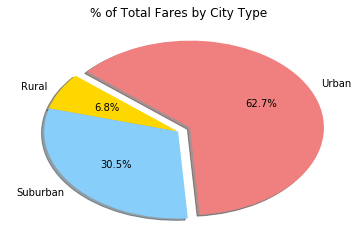

In [107]:
# Calculate Type Percents
groupedType = combined_df.groupby('type')
totalFare = combined_df['fare'].sum()
totalFBC = groupedType['fare'].sum()

percentages = [totalFBC[i]/totalFare*100 for i in range(3)]

# Build Pie Chart
explode = (0, 0, 0.1)
cityTypes = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(percentages, explode=explode, labels=cityTypes, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig('PyberTotalFares.png')
plt.show()

## Total Rides by City Type

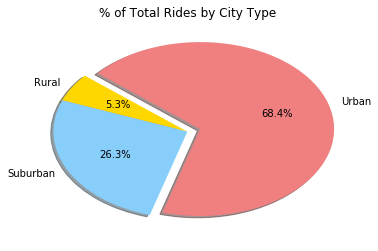

In [108]:
# Calculate Ride Percents
totalRides = len(combined_df['fare'])
totalRBC = groupedType['fare'].count()

percentages2 = [totalRBC[i]/totalRides*100 for i in range(3)]

# Build Pie Chart
plt.pie(percentages2, explode=explode, labels=cityTypes, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('PyberTotalRides.png')
plt.show()

## Total Drivers by City Type

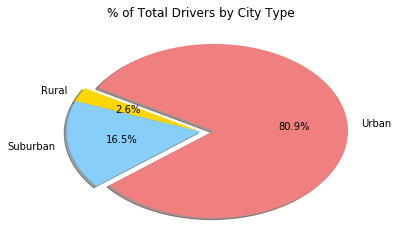

In [109]:
# Calculate Driver Percents
groupedType = newDF.groupby('City Type')
totalDrivers = groupedCity.apply(lambda x: x['driver_count'].unique()).sum()
totalDBC = groupedType['Total Drivers'].sum()

percentages3 = [totalDBC[i]/totalDrivers*100 for i in range(3)]
percentages3
# Build Pie Charts
plt.pie(percentages3, explode=explode, labels=cityTypes, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=150)
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig('PyberTotalDrivers.png')
plt.show()